# **SUMUR POTENSIAL BERHINGGA SATU DIMENSI**
Islamuddin Alimurrijal

Suatu partikel berada pada sumur potensial berhingga satu dimensi ditunjukkan pada gambar di bawah ini.

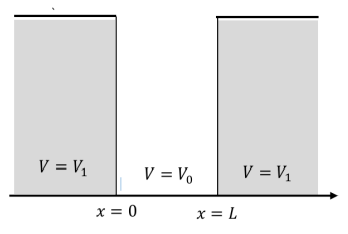


Dimisalkan sumur potensial tersebut memiliki lebar $L=4 ~a.u$ dengan potensial $V_0=0 ~a.u$ dan $V_1=7 ~a.u$, maka permasalahan tersebut dapat diselesaikan secara analitik dan numerik.

##Solusi Analitik

Berdasarkan gambar di atas, terdapat potensial di luar sumur sebesar $V_1$ sehingga ada kemungkinan partikel untuk menembus potensial dan keluar dari sumur tersebut. 

Solusi dari sumur potensial berhingga dengan lebar L dan kedalaman V memenuhi persamaan berikut.
\begin{align}
\frac{2\sqrt{(V-E)E}}{(2E-V)} = \tan{(2EL^2)}
\end{align}

Persamaan di atas dapat diselesaikan dengan memilih nilai $E$ yang memenuhi persamaan tersebut, yaitu nilai $E$ yang menyebabkan kedua ruas persamaan benilai sama.

## Solusi Numerik

Solusi numerik permasalahan tersebut dapat dihitung dengan menentukan syarat batas potensial di sepanjang sumur potensial, kemudian menyelesaikan persamaan Schrodinger pada setiap tingkat energi. Implementasi permasalah tersebut secara numerik dapat dilihat pada program di bawah ini dengan mengatur nilai potensial sesuai dengan permasalahan.

In [ ]:
#Import necessary library
import numpy as np
import pandas as pd

In [ ]:
def potential(xmin, xmax):
  '''
  Set the potential within the system in certain interval
  Input   : x interval, xfar
  Return  : potential
  '''

  # potential_v = 0
  v1 = 10
  v0 = 7/2
  xbound = 2 #X boundary

  if (abs(xmin) < xbound):
    potential_v = v0
  else:
    potential_v = v1

  return potential_v

In [ ]:
def normalize(n, h, psi):
  '''
  Normalize wave function
  Input   : initial wave function, number of points, step
  Return  : normalized wave function
  '''
  norm = psi[0]**2+psi[n]**2
  for i in range(1,n-3,2):
    norm = norm+4*psi[i]**2+2*psi[i+1]**2

  norm = norm + 4*psi[n-1]**2
  norm = 1/np.sqrt((norm*h/3))

  for i in range(0, len(psi)):
   psi[i] = psi[i]*norm

  return psi

In [ ]:
def numerov(nx, x, e_init, psi):
  '''
  Integrates the wave function using Numerov's method
  Input   : number of points, x inteval, initial energy, wave function
  Return  : integrated wave function
  '''

  #Calculates the steps
  h = xmax/nx
  h2 = h**2
  h12 = h2/12

  #Initialize wave function
  psi[0] = 0
  psi[1] = 0.0001

  #Calculates using Numerov's nethod
  fn = 2*(potential(-x, x)-e_init)
  q0 = psi[0]*(1-h12*fn)
  fn = 2*(potential(-x+h, x)-e_init)
  q1 = psi[1]*(1-h12*fn)
  
  for n in range(2, 2*nx+1):
    q2 = h2*fn*psi[n-1]+2*q1-q0
    fn = 2*(potential(n*h-x, x)-e_init)
    psi[n] = q2/(1-h12*fn)
    q0 = q1
    q1 = q2

  psi = normalize(2*nx, h, psi)

  return psi

In [ ]:
def calculates(nx, x, e_init, de, eps, psi):
  '''
  Starting course search and approximate energy level using bisection method
  Input   : number of points, x inteval, initial energy,
            eps, lists to store energy and deviation
  Return  : Energy approximation, wave function
  '''
  #Starting course search
  psi = numerov(nx, x, e_init, psi)
  dev1 = psi[2*nx]

  while True:
    #Update energy with de step
    e2 = e_init + de
 
    psi = numerov(nx, x, e2, psi)
    dev2 = psi[2*nx]

    #Check if deviation is zero
    if dev1*dev2 < 0:
      break

    #Update energy and deviation value for next iteration  
    e_init = e2
    dev1 = dev2

  #Starting bisection
  while abs(e_init-e2) > eps:
    e3 = (e_init+e2)/2
    psi = numerov(nx,x,e3,psi)
    dev3 = psi[2*nx]

    if dev3*dev1 <= 0.000000 :
      e2 = e3
      dev2 = dev3
    else:
      e_init = e3
      dev2 = dev3

  return e3, psi

In [ ]:
def schrod(nx, xmax, e0, de, filename, n):
  '''
  A function to calculates energy and wave function
  Input   : number of points, x interval, initial energy, delta e, filename, energy level
  Return  : approximated energy, psi .date file
  '''
  #Initialize Parameters
  eps = 10e-6
  dx = xmax/nx

  #Initialize wave function
  psi = np.zeros(2*nx+1)

  #Calculates energy and deviation
  energy, psi = calculates(nx, xmax, e0, de, eps, psi)

  #Save output as dat file
  filename = filename + str(n) + '.dat'
  x = np.zeros(2*nx+1)
  for i in range(1, 2*nx+2):
    x[i-1] = (i-1)*dx-xmax
    
  with open(filename, 'w') as out_file:
    for item in range(len(psi)):
      # out_file.write(str(x[item]) + '      ' + (psi[item]) + '\n')
      out_file.write("{}      {}      \n".format(x[item], psi[item]))

  return energy

### Input parameter yang diinginkan

In [ ]:
#Initialize Parameters
nx = 100 #Number of points
xbound = 2
xmax = 4 #Choose xmax at least 2*(L/2) greater than xbound
e0 = 0 #Guessed energy
de = 0.001 #Energy step

energy_level = [i for i in range(1, 11)]
energy_value = []
filename = 'psi-outfinite' #Change name according to the case

for i in energy_level:
  energy = schrod(nx, xmax, e0, de, filename, i)
  energy_value.append(energy)

  #Update for the next energy level
  e0 = energy + 0.005

In [ ]:
#Make dataframe to store energy

output = pd.DataFrame(columns=['Energy Level', 'Energy (a.u.)'])

for i in range(len(energy_level)):
  output.loc[i] = [energy_level[i], energy_value[i]]

output

,Energy Level,Energy (a.u.)
0,1.0,3.741633
1,2.0,4.461797
2,3.0,5.643758
3,4.0,7.246953
4,5.0,9.150273
5,6.0,10.710719
6,7.0,11.230523
7,8.0,12.053203
8,9.0,13.649102
9,10.0,14.834953


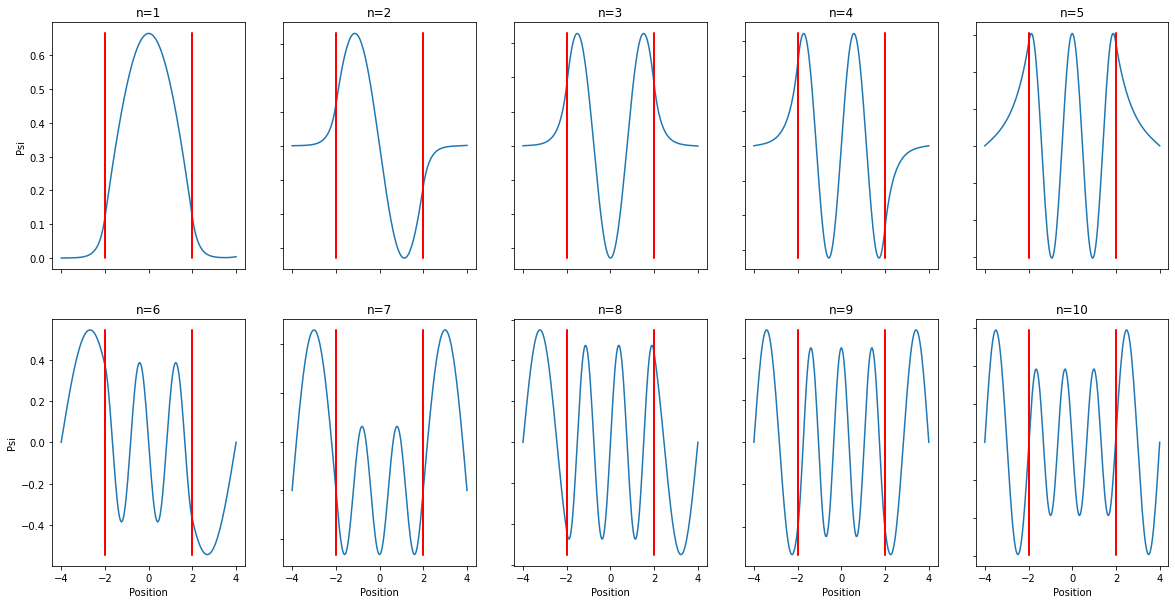

In [ ]:
#Plot wave function
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(20, 10))
x_bound1 = np.ones(2*nx+1)
x_bound2 = np.ones(2*nx+1)
x_bound1 = x_bound1 * -xbound
x_bound2 = x_bound2 * xbound

for n in range(1, 11):
  data = np.loadtxt(filename+str(n)+'.dat', unpack=True)
  x_pos = data[0]
  psii = data[1]

  if n < 6:
    ax[0, n-1].plot(x_pos, psii)
    ax[0, n-1].plot(x_bound1, psii, color='red')
    ax[0, n-1].plot(x_bound2, psii, color='red')
    ax[0, n-1].set_title('n='+ str(n))
  else:
    ax[1, n-6].plot(x_pos, psii)
    ax[1, n-6].plot(x_bound1, psii, color='red')
    ax[1, n-6].plot(x_bound2, psii, color='red')
    ax[1, n-6].set_title('n='+ str(n))

for axis in ax.flat:
  axis.set(xlabel='Position', ylabel='Psi')

for axis in ax.flat:
    axis.label_outer()

plt.show()

### Perhitungan analitik

Permasalahan partikel dalam potensial berhingga secara analitik dapat diselesaikan dengan memilih nilai E yang memenuhi persamaan di bawah ini.
\begin{align}
\frac{2\sqrt{(V-E)E}}{(2E-V)} = \tan{(2EL^2)}
\end{align}

Persamaan di atas dapat diselesaikan dengan menghitung persamaan ruas kanan (RHS) dan persamaan ruas kiri (LHS) kemudian menentukan selisih keduanya. Jika selisihnya sangat mendekati nol, maka nilai energi E yang dipilih memenuhi persamaan tersebut.

Dibawah ini adalah program untuk menentukan nilai E secara analitik yang didasarkan pada pengecekan nilai E yang memenuhi:
\begin{align}
\big|\frac{2\sqrt{(V-E)E}}{(2E-V)}\big| - \big| \tan{(2EL^2)} \big| \le error
\end{align}

Nilai $error$ dipilih nilai yang sangat mendekati nol.


In [ ]:
def LHS(E, V):
  '''
  Left handside equation
  Input   : energy, potential
  Return  : lhs
  '''
  lhs = 2*(np.sqrt((V-E)*E))/(2*E-V)
  return lhs

def RHS(E, L):
  '''
  Right handside equation
  Input   : energy, well's width
  Return  : rhs
  '''
  rhs =  np.tan((2*E*L**2))
  return rhs


In [ ]:
#Initialize parameters
v1 = 10
v0 = 7/2
V = v1-v0
L = 8
error = 0.01
e0 = 0.01
de = 0.01 #energi step
n = 0
possible_energy = pd.DataFrame(columns=['Energy Level', 'Energy (a.u.)'])

while True:
  diff = abs(LHS(e0, V)) - abs(RHS(e0, L))

  if abs(diff) < error:
    possible_energy.loc[n] = [n+1, e0]
    n += 1

  e0 = e0+de

  if e0 >= V:
    break

possible_energy

,Energy Level,Energy (a.u.)
0,1.0,0.34
1,2.0,1.00
2,3.0,5.59


### **Download Output Files**

In [ ]:
# !rm * #Delete all files

In [ ]:
from google.colab import files

file_name = 'psi-out'
case_name = ['a', 'b', 'c', 'd']

for case in case_name:
  for n in energy_level:
    files.download('/content/psi-out'+case+str(n)+'.dat')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>